# Scikit-Learn을 활용한 Regression - Boston 집값 예측 

In [1]:
#1 데이터 불러오기 
from sklearn.datasets import load_boston

boston_data = load_boston()
print(boston_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [2]:
# 2. 데이터 확인 
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print(boston_data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# 3. pandas data 확인 
import pandas as pd 
boston_pd = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# 4. 타겟 추가 (중앙값)
boston_pd['MEDV'] = boston_data.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# 5. 빈 값 확인 
boston_pd.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

c:\python\37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


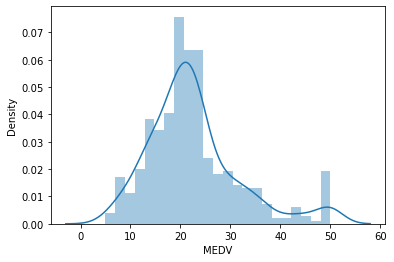

In [7]:
# 6. 집 값 분포 시각화 
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(boston_pd['MEDV'])
plt.show()

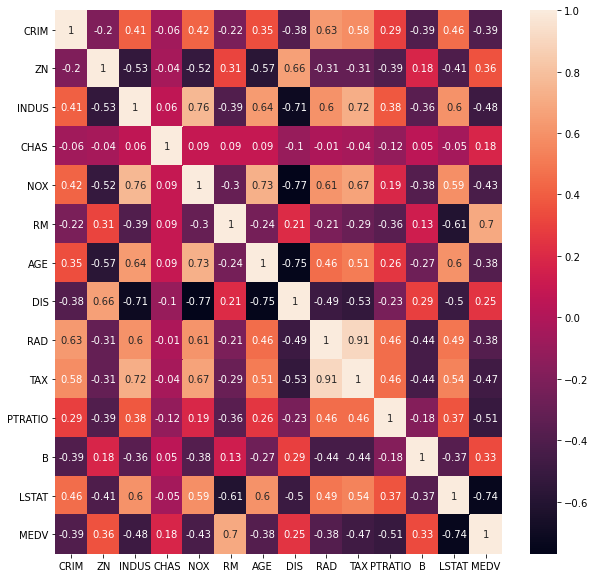

In [8]:
# 7. 피쳐-타겟 상관관계 확인 (코릴레이션 계산)
correlation_matrix = boston_pd.corr().round(2)   # 소수점 2자리까지만 표현 
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [9]:
# 8. X/Y 분리 

X = boston_pd.drop(['MEDV', 'NOX', 'DIS', 'TAX'], axis=1)    # 제거 내용을 변경해서 확인해보기
Y = boston_pd['MEDV']
print(X.shape)
print(Y.shape)

(506, 10)
(506,)


In [10]:
# 9. 학습셋 / 평가셋 분리(Data Split)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)   # 학습 80%, 테스트 20%, 랜덤 고정
print(X_train[0:5])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

        CRIM   ZN  INDUS  CHAS     RM   AGE   RAD  PTRATIO       B  LSTAT
181  0.06888  0.0   2.46   0.0  6.144  62.2   3.0     17.8  396.90   9.45
122  0.09299  0.0  25.65   0.0  5.961  92.9   2.0     19.1  378.09  17.93
99   0.06860  0.0   2.89   0.0  7.416  62.5   2.0     18.0  396.90   6.19
220  0.35809  0.0   6.20   1.0  6.951  88.5   8.0     17.4  391.70   9.71
474  8.05579  0.0  18.10   0.0  5.427  95.4  24.0     20.2  352.58  18.14
(404, 10)
(102, 10)
(404,)
(102,)


In [11]:
# 10. data 정규화 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[0:9])

[[-0.40020526 -0.4954587  -1.27626786 -0.26761547 -0.19458528 -0.21547445
  -0.75941094 -0.2914471   0.43310562 -0.45366722]
 [-0.39751413 -0.4954587   2.10671382 -0.26761547 -0.45824043  0.86865458
  -0.8753603   0.31165777  0.20671329  0.74899745]
 [-0.40023651 -0.4954587  -1.213539   -0.26761547  1.63803407 -0.20488035
  -0.8753603  -0.19866174  0.43310562 -0.91601236]
 [-0.36792395 -0.4954587  -0.73067271  3.73670483  0.96809067  0.71327452
  -0.17966411 -0.47701783  0.37051975 -0.41679307]
 [ 0.49128503 -0.4954587   1.00531185 -0.26761547 -1.22759478  0.9569387
   1.67552572  0.82197728 -0.10031851  0.77878042]
 [-0.40045528 -0.4954587  -1.04431698 -0.26761547  0.38459159 -1.24310163
  -0.52751221 -0.84815929  0.3616133  -1.03798071]
 [-0.39209949 -0.4954587  -0.62709716 -0.26761547 -0.15856682 -2.17891333
  -0.75941094 -0.24505442  0.27026201 -0.96990535]
 [-0.4068823   3.3874766  -1.20186852 -0.26761547  1.16547185 -1.67745951
  -0.99130967 -1.45126417  0.4068677  -0.68058508]
 

In [12]:
# 11. Regression 학습 
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# 다른 알고리즘 적용 
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [14]:
# 12. 모델 평가 
y_predict = lin_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print('MSE = {}'.format(mse))
print('R2 = {}'.format(r2))

MSE = 29.11190378068138
R2 = 0.7122959025355964


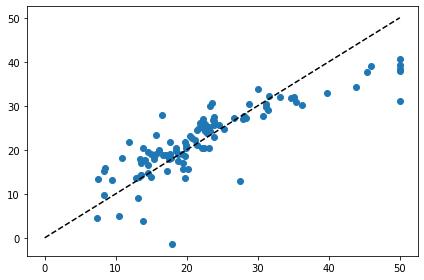

In [15]:
# 13. 모델 시각화 
plt.scatter(Y_test, y_predict)
plt.plot([0, 50], [0, 50], '--k')
plt.tight_layout()